In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
from nanonets import NanoparticleElectrostatic
# from nanonets.utils import 

plt.style.use(["science","bright","grid"])

In [47]:
sim     = NanoparticleElectrostatic()
h_vals  = np.linspace(1.0,100.0,100)
cap     = [sim.self_capacitance_sphere(3.9,10.0,h_oxide) for h_oxide in h_vals]
cap0    = sim.self_capacitance_sphere(3.9,10.0)
capm    = [sim.mutual_capacitance_adjacent_spheres(2.6,10.0,10.0,distance=h_oxide) for h_oxide in h_vals]
capm0   = sim.self_capacitance_sphere(3.9,10.0)

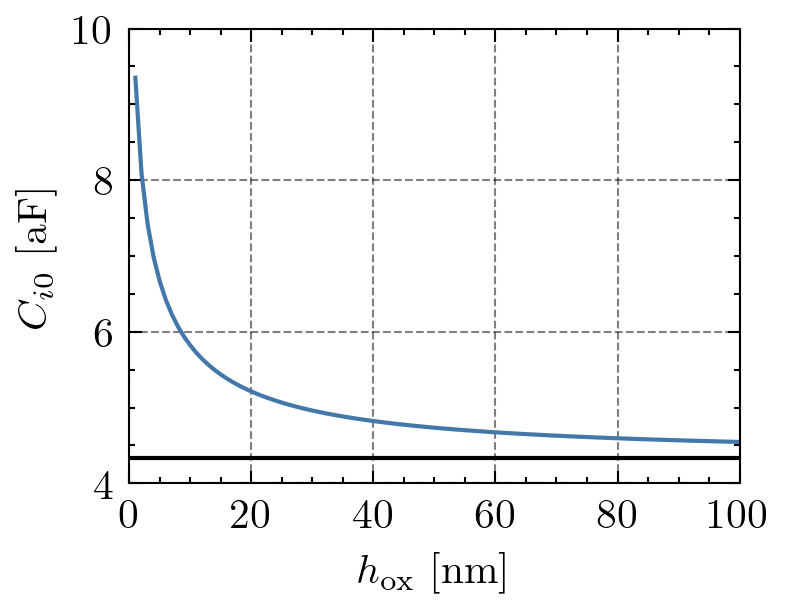

In [53]:
fig, ax = plt.subplots(dpi=300)
w, h    = fig.get_size_inches()
scale   = 0.75
fig.set_size_inches(w * scale, h * scale)

_ = ax.plot(h_vals, cap)
# _ = ax.plot(h_vals, capm)
_ = plt.axhline(cap0, color='black')
_ = ax.set_xlim(0,100)
_ = ax.set_ylim(4,10)
_ = ax.set_xticks([0,20,40,60,80,100])
_ = ax.set_xlabel("$h_\\textrm{ox}~[\mathrm{nm}]$")
_ = ax.set_ylabel("$C_{i0}~[\mathrm{aF}]$")

[14.91 15.68 15.71 15.71 15.71 15.7  15.52 12.56 15.52 15.7  15.71 15.71
 15.71 15.68 14.91 15.68 13.22 13.1  13.1  13.1  13.09 13.07 12.95 13.07
 13.09 13.1  13.1  13.1  13.22 15.68 15.71 13.1  12.96 12.95 12.95 12.95
 12.95 12.95 12.95 12.95 12.95 12.95 12.96 13.1  15.71 15.71 13.1  12.95
 12.95 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.95 12.95 13.1  15.71
 15.71 13.1  12.95 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.94
 12.95 13.1  15.71 15.7  13.09 12.95 12.94 12.94 12.94 12.94 12.94 12.94
 12.94 12.94 12.94 12.95 13.09 15.7  15.52 13.07 12.95 12.94 12.94 12.94
 12.94 12.94 12.94 12.94 12.94 12.94 12.95 13.07 15.52 12.56 12.95 12.95
 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.95 12.95 12.56
 15.52 13.07 12.95 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.94 12.94
 12.95 13.07 15.52 15.7  13.09 12.95 12.94 12.94 12.94 12.94 12.94 12.94
 12.94 12.94 12.94 12.95 13.09 15.7  15.71 13.1  12.95 12.94 12.94 12.94
 12.94 12.94 12.94 12.94 12.94 12.94 12.95 13.1  15

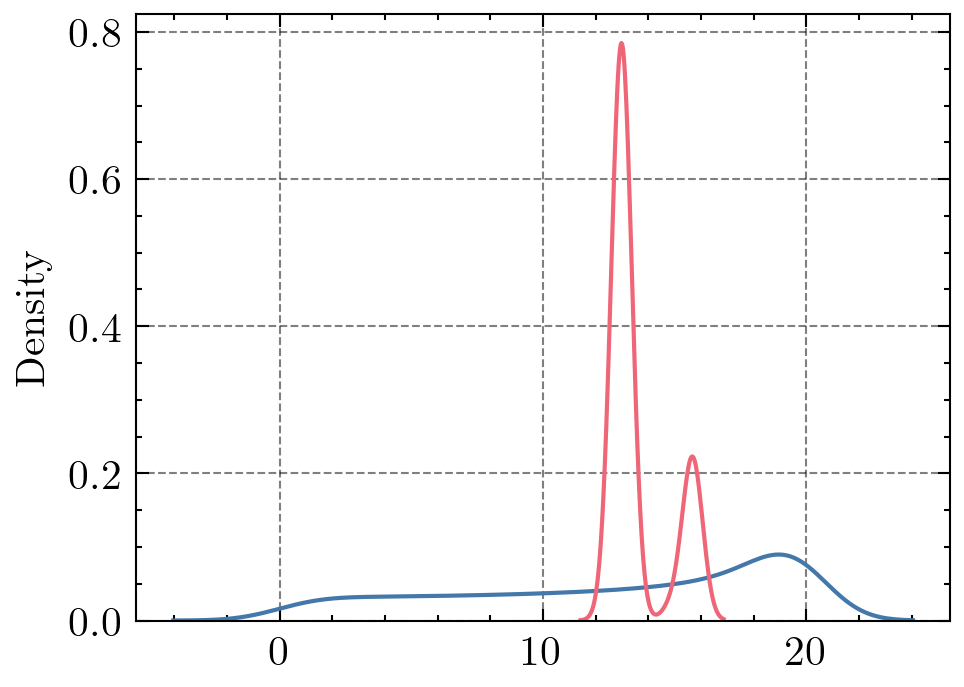

In [59]:
L    = 15
E_AC = 0.160217662
sim  = NanoparticleElectrostatic()

sim.lattice_network(L, L)
sim.add_electrodes_to_lattice_net([[(L-1)//2, 0],[0, 0],[L-1, 0],[0, (L-1)//2],[L-1, (L-1)//2],[0, L-1],[L-1, L-1],[(L-1)//2, L-1]])
sim.init_nanoparticle_radius()
sim.pack_lattice()
sim.calc_capacitance_matrix(short_range=True)
sim.calc_electrode_capacitance_matrix(short_range=True)

c_mat = sim.get_capacitance_matrix()
c_inv = np.linalg.inv(c_mat)
E_c   = np.round(1000 * c_inv.diagonal() * E_AC,2)
c_ele = sim.get_electrode_capacitance_matrix()

print(E_c)

fig = plt.figure(dpi=300)
ax  = fig.add_subplot()
ax  = sns.kdeplot(20*np.abs(np.sin(2*np.pi*np.linspace(0,10,2000))))
ax  = sns.kdeplot(E_c)

[37.7 50.2 52.3 47.6 31.4 47.6 52.3 50.2 37.7 50.2 45.4 44.5 42.3 39.2
 42.3 44.5 45.4 50.2 52.3 44.5 42.8 41.7 41.  41.7 42.8 44.5 52.3 47.6
 42.3 41.7 41.5 41.3 41.5 41.7 42.3 47.6 31.4 39.2 41.  41.3 41.4 41.3
 41.  39.2 31.4 47.6 42.3 41.7 41.5 41.3 41.5 41.7 42.3 47.6 52.3 44.5
 42.8 41.7 41.  41.7 42.8 44.5 52.3 50.2 45.4 44.5 42.3 39.2 42.3 44.5
 45.4 50.2 37.7 50.2 52.3 47.6 31.4 47.6 52.3 50.2 37.7]


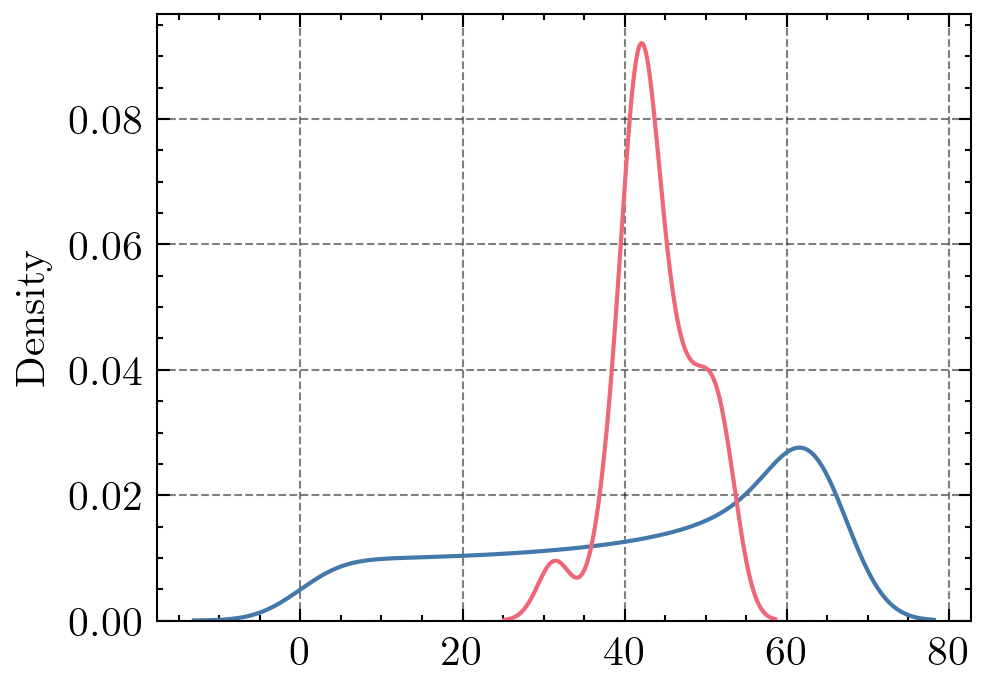

In [62]:
L    = 9
E_AC = 0.160217662
sim  = NanoparticleElectrostatic()

sim.lattice_network(L, L)
sim.add_electrodes_to_lattice_net([[(L-1)//2, 0],[0, 0],[L-1, 0],[0, (L-1)//2],[L-1, (L-1)//2],[0, L-1],[L-1, L-1],[(L-1)//2, L-1]])
sim.init_nanoparticle_radius()
sim.pack_lattice()
sim.calc_capacitance_matrix(short_range=True)
sim.calc_electrode_capacitance_matrix(short_range=True)

c_mat = sim.get_capacitance_matrix()
c_mat = c_mat - np.eye(L*L,L*L)*cap0
c_inv = np.linalg.inv(c_mat)
E_c   = np.round(1000 * c_inv.diagonal() * E_AC,1)
c_ele = sim.get_electrode_capacitance_matrix()

print(E_c)

fig = plt.figure(dpi=300)
ax  = fig.add_subplot()
ax  = sns.kdeplot(65*np.abs(np.sin(2*np.pi*np.linspace(0,10,2000))))
ax  = sns.kdeplot(E_c)